In [44]:
import pandas as pd
import wikipedia
import numpy as np
from pprint import pprint
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from config import api_key

In [36]:
dis_income_df =pd.read_csv("data\DSPIC96.csv")
len_dis_income = dis_income_df.count()


print(dis_income_df.head(40))

         DATE  DSPIC96
0    1/1/1959   2187.2
1    2/1/1959   2193.8
2    3/1/1959   2206.4
3    4/1/1959   2220.7
4    5/1/1959   2232.8
5    6/1/1959   2240.2
6    7/1/1959   2236.7
7    8/1/1959   2223.5
8    9/1/1959   2224.4
9   10/1/1959   2226.1
10  11/1/1959   2242.1
11  12/1/1959   2263.9
12   1/1/1960   2268.8
13   2/1/1960   2269.2
14   3/1/1960   2271.9
15   4/1/1960   2280.6
16   5/1/1960   2285.6
17   6/1/1960   2287.7
18   7/1/1960   2291.4
19   8/1/1960   2286.2
20   9/1/1960   2289.4
21  10/1/1960   2297.8
22  11/1/1960   2288.3
23  12/1/1960   2278.0
24   1/1/1961   2300.0
25   2/1/1961   2309.6
26   3/1/1961   2319.3
27   4/1/1961   2324.1
28   5/1/1961   2343.0
29   6/1/1961   2367.1
30   7/1/1961   2375.2
31   8/1/1961   2375.3
32   9/1/1961   2377.4
33  10/1/1961   2402.5
34  11/1/1961   2424.7
35  12/1/1961   2439.5
36   1/1/1962   2433.4
37   2/1/1962   2444.4
38   3/1/1962   2460.6
39   4/1/1962   2471.5


In [48]:
dis_date=[]
dis_inc=[]
for index, row in dis_income_df.iterrows():
    yyyy_mm = f'{row["DATE"][4:9]}-0{row["DATE"][0:1]}'
    if row["DATE"][0:2] =='10' or row["DATE"][0:2] =='11' or row["DATE"][0:2] =='12' :
        yyyy_mm = f'{row["DATE"][5:10]}-{row["DATE"][0:2]}'
    if yyyy_mm > '2012':
        dis_date.append(yyyy_mm)
        income = row["DSPIC96"]
        dis_inc.append(income)

disp_income_df = pd.DataFrame({
    "Date" : dis_date,
    "Disp_Inc" : dis_inc
})

In [65]:
x_axis_dis = np.arange(len(disp_income_df))
tick_locations = [value+0.4 for value in x_axis_dis]


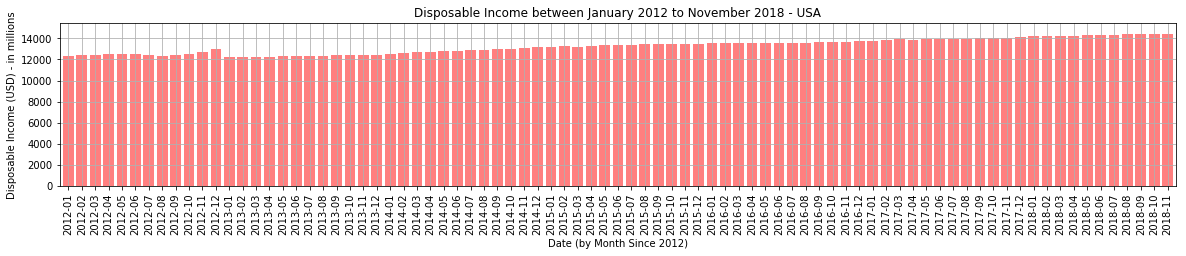

In [57]:
plt.figure(figsize=(20,3))
plt.bar(x_axis_dis, disp_income_df["Disp_Inc"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, disp_income_df["Date"], rotation='vertical')
plt.xlim(-0.25, len(x_axis_dis))
plt.title("Disposable Income between January 2012 to November 2018 - USA")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Disposable Income (USD) - in millions")
plt.ylim(0, max(disp_income_df["Disp_Inc"])+1000)
plt.grid()
plt.show()

In [49]:
print(len(disp_income_df))
print(disp_income_df)

83
       Date  Disp_Inc
0   2012-01   12311.0
1   2012-02   12385.4
2   2012-03   12429.3
3   2012-04   12477.1
4   2012-05   12487.5
5   2012-06   12498.7
6   2012-07   12410.1
7   2012-08   12362.6
8   2012-09   12422.5
9   2012-10   12516.4
10  2012-11   12693.1
11  2012-12   13016.3
12  2013-01   12266.8
13  2013-02   12205.2
14  2013-03   12223.9
15  2013-04   12271.9
16  2013-05   12342.2
17  2013-06   12355.0
18  2013-07   12341.5
19  2013-08   12368.7
20  2013-09   12418.7
21  2013-10   12386.0
22  2013-11   12425.3
23  2013-12   12464.3
24  2014-01   12532.0
25  2014-02   12618.0
26  2014-03   12693.3
27  2014-04   12725.5
28  2014-05   12760.6
29  2014-06   12811.7
..      ...       ...
53  2016-06   13534.4
54  2016-07   13571.6
55  2016-08   13583.4
56  2016-09   13623.7
57  2016-10   13654.5
58  2016-11   13688.5
59  2016-12   13713.1
60  2017-01   13772.9
61  2017-02   13832.9
62  2017-03   13900.3
63  2017-04   13875.3
64  2017-05   13932.5
65  2017-06   13921.6
66  201

In [ ]:
#alphavantage_key = "QIT4B3LLKYRYT48J"

In [ ]:
#url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=AAPL&apikey={alphavantage_key}'



In [45]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_monthly(symbol='AAPL')

In [46]:
new_data=data
new_data.reset_index(inplace=True)
print(new_data.head())


         date  1. open  2. high  3. low  4. close   5. volume
0  1998-02-27    18.50    23.87   17.37     23.62  65662200.0
1  1998-03-31    23.56    28.00   21.62     27.50  94874800.0
2  1998-04-30    27.44    29.62   24.69     27.37  72159700.0
3  1998-05-29    27.50    31.62   25.62     26.62  60744100.0
4  1998-06-30    26.50    29.00   25.62     28.69  34909300.0


In [47]:
#print(new_data.columns)
stock_data=[]
stock_close=[]


for index, row in new_data.iterrows():
    new_date = row["date"]
    new_close=row["4. close"]
    if new_date>='2012':
        stock_data.append(new_date[0:7])
        if new_date<'2014-06':
            new_close = new_close / 7
        stock_close.append(new_close)
#print(len(stock_data))
#print(len(stock_close))
#print(stock_data)

new_stock_dict = {
    "date" : stock_data,
    "close" : stock_close
}

stock_data_df = pd.DataFrame(new_stock_dict)

print(stock_data_df)

       date       close
0   2012-01   65.211429
1   2012-02   77.491429
2   2012-03   85.650000
3   2012-04   83.425714
4   2012-05   82.532857
5   2012-06   83.428571
6   2012-07   87.251429
7   2012-08   95.034286
8   2012-09   95.300714
9   2012-10   85.045714
10  2012-11   83.611429
11  2012-12   76.024700
12  2013-01   65.070000
13  2013-02   63.057143
14  2013-03   63.237143
15  2013-04   63.254286
16  2013-05   64.247857
17  2013-06   56.647143
18  2013-07   64.647143
19  2013-08   69.602286
20  2013-09   68.107143
21  2013-10   74.671714
22  2013-11   79.438571
23  2013-12   80.145714
24  2014-01   71.514286
25  2014-02   75.177143
26  2014-03   76.677143
27  2014-04   84.298571
28  2014-05   90.428571
29  2014-06   92.930000
..      ...         ...
57  2016-10  113.540000
58  2016-11  110.520000
59  2016-12  115.820000
60  2017-01  121.350000
61  2017-02  136.990000
62  2017-03  143.660000
63  2017-04  143.650000
64  2017-05  152.760000
65  2017-06  144.020000
66  2017-07  148

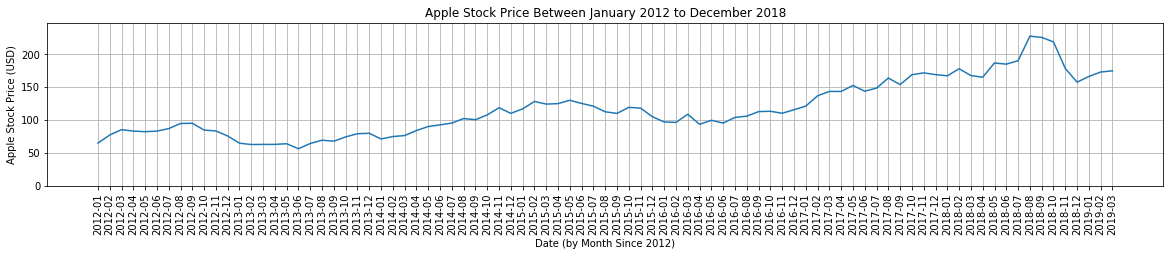

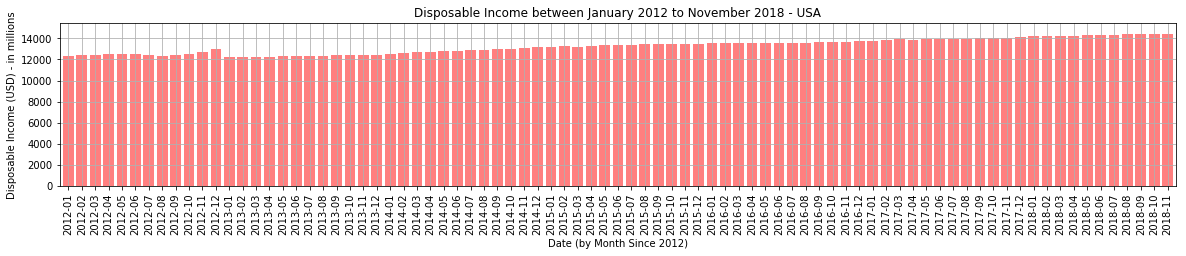

In [66]:
plt.figure(figsize=(20,3))
x_axis_stock = np.arange(len(stock_data_df))
plt.xticks(rotation='vertical')
plt.plot(stock_data_df["date"], stock_data_df['close'])
#plt.xlim(-0.25, len(x_axis_dis))
plt.title("Apple Stock Price Between January 2012 to December 2018")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Apple Stock Price (USD)")
plt.ylim(0, max(stock_data_df["close"])+20)
plt.grid()
#plt.show()

plt.figure(figsize=(20,3))
plt.bar(x_axis_dis, disp_income_df["Disp_Inc"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, disp_income_df["Date"], rotation='vertical')
plt.xlim(-0.25, len(x_axis_dis))
plt.title("Disposable Income between January 2012 to November 2018 - USA")
plt.xlabel("Date (by Month Since 2012)")
plt.ylabel("Disposable Income (USD) - in millions")
plt.ylim(0, max(disp_income_df["Disp_Inc"])+1000)
plt.grid()
plt.show()

In [ ]:
plt.title('Times Series for the AAPL stock (monthly))')
plt.show()